# Exercise on Mixture exercises and some

### António Rebelo (55761) & Marco Mercier (55877)

## Exercise 1 - AdaBoost

In [1]:
import pandas as pd
import numpy as np

### Data Cleaning

In [2]:
raw_data = pd.read_csv('breast-cancer-wisconsin.data',names=['id','clump_thickness','cell_uniformity',
                                                             'marginal_adhesion','cell_size','bare_nuclei',
                                                             'chromatin','nucleoli','mitoses','class'])

In [3]:
raw_data.drop('id',axis=1,inplace=True)

In [4]:
raw_data.dtypes

clump_thickness       int64
cell_uniformity       int64
marginal_adhesion     int64
cell_size             int64
bare_nuclei          object
chromatin             int64
nucleoli              int64
mitoses               int64
class                 int64
dtype: object

Bare_nuclei has missing values that come in the form of '?'. Let's replace them by the mean

In [5]:
mean = raw_data.bare_nuclei[raw_data.bare_nuclei!= '?'].astype(float).mean()

raw_data.bare_nuclei = raw_data.bare_nuclei.replace('?',mean).astype(float)

define the target variable and seperate it.

In [6]:
target = raw_data['class'].copy()
data = raw_data.drop('class',axis = 1)

In [7]:
target = target.apply(lambda x: 1 if x == 4 else 0)

## Training 
* Exercise 1: use a regression model to classify (logistic regression) and record the accuracy
* Exercise 2: use AdaBoost with 7 logistic regression base learner experts and compare results

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
alg1 = LogisticRegression()
alg2 = AdaBoostClassifier(base_estimator= LogisticRegression(),n_estimators = 7)

For Logistic Regression

In [9]:
#set up cross validation
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 )
#train the Logistic Regression model
cv_results = (model_selection.cross_validate(alg1, data, target, cv  = cv_split, 
                                                    scoring = ['f1','accuracy'], n_jobs =-1))


pd.DataFrame({"Mean F1": [cv_results['test_f1'].mean()] ,"Mean Accuracy":[cv_results['test_accuracy'].mean()] })

,Mean F1,Mean Accuracy
0,0.943342,0.959286


For AdaBoost with Logistic Regression and 7 estimators

In [10]:

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 )
cv_results = (model_selection.cross_validate(alg2, data, target, cv  = cv_split, 
                                                    scoring = ['f1','accuracy'], n_jobs =-1))


pd.DataFrame({"Mean F1": [cv_results['test_f1'].mean()] ,"Mean Accuracy":[cv_results['test_accuracy'].mean()] })

,Mean F1,Mean Accuracy
0,0.938643,0.956429


### Take-aways
* The results vary only very slightly
* The accuracy of the LogisticRegression alone is higher, but the f1 score, an arguably more important metric in this case, is better in AdaBoost


### Part 2
* Exercise 3: compare with other numbers of experts (ex. 3, 10)

* Exercise 4: repeat 2 and 3 with decision tree base learner experts

Now increasing the estimators with Logistic Regression as base classifier

In [11]:
MLA_compare = pd.DataFrame()
for n_estimators in range(3,11):
    alg = AdaBoostClassifier(base_estimator= LogisticRegression(),n_estimators = n_estimators)
    
    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
    cv_results = (model_selection.cross_validate(alg, data, target, cv  = cv_split, 
                                                        scoring = ['f1','accuracy','recall','precision'], n_jobs =-1))

    MLA_compare.loc[n_estimators, 'n_estimators'] = n_estimators
    MLA_compare.loc[n_estimators, 'Mean F1'] = cv_results['test_f1'].mean()  
    MLA_compare.loc[n_estimators, 'Mean Accuracy'] = cv_results['test_accuracy'].mean()
    
MLA_compare

,n_estimators,Mean F1,Mean Accuracy
3,3.0,0.936088,0.957143
4,4.0,0.935138,0.956667
5,5.0,0.936659,0.957619
6,6.0,0.938357,0.958571
7,7.0,0.938357,0.958571
8,8.0,0.938357,0.958571
9,9.0,0.936924,0.957619
10,10.0,0.936924,0.957619


The results remain basically unaltered. Increasing the number of base estimators did very little to improve results.

## Decision Trees
Now let's see what happens with Decision Tree base learners (the default option). First let's train the model alone.

In [12]:
from sklearn.tree import DecisionTreeClassifier
alg3 = DecisionTreeClassifier()

In [13]:
#set up cross validation
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 )
#train the Logistic Regression model
cv_results = (model_selection.cross_validate(alg3, data, target, cv  = cv_split, 
                                                    scoring = ['f1','accuracy'], n_jobs =-1))


pd.DataFrame({"Mean F1": [cv_results['test_f1'].mean()] ,"Mean Accuracy":[cv_results['test_accuracy'].mean()] })

,Mean F1,Mean Accuracy
0,0.92334,0.945


Now we use AdaBoost with a different number of learners

In [14]:
MLA_compare = pd.DataFrame()
for n_estimators in range(3,11):
    alg = AdaBoostClassifier(n_estimators = n_estimators)
    
    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
    cv_results = (model_selection.cross_validate(alg, data, target, cv  = cv_split, 
                                                        scoring = ['f1','accuracy','recall','precision'], n_jobs =-1))

    MLA_compare.loc[n_estimators, 'n_estimators'] = n_estimators
    MLA_compare.loc[n_estimators, 'Mean F1'] = cv_results['test_f1'].mean()  
    MLA_compare.loc[n_estimators, 'Mean Accuracy'] = cv_results['test_accuracy'].mean()
    
MLA_compare

,n_estimators,Mean F1,Mean Accuracy
3,3.0,0.904145,0.936667
4,4.0,0.904560,0.937143
5,5.0,0.908046,0.939524
6,6.0,0.914380,0.942857
7,7.0,0.914674,0.943333
8,8.0,0.927752,0.951429
9,9.0,0.933786,0.955238
10,10.0,0.934403,0.955238


### Take-aways
* Contrarily to what happened with the logistic regression, in this case, increasing the number of estimators has a significant impact on performance, both relative models with less estimators and relative to the single DecisionTreeClassifier model.
* AdaBoost benefits some base estimators more than others. In this case it was seen that Decision Trees work particularly well whereas Logistic regression not so much


# Exercise 2 - K-means and SOM

In [15]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

Lets load the iris dataset directly from sklearn datasets:

In [16]:
iris = load_iris()
X = iris.data
y = iris.target

Lets train test split so we can evaluate the performance of the models:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [18]:
def make_confusion_matrix(y_true, y_pred, y_train, y_pred_train, labels=iris.target_names, title=''):
    '''function to create confusion matrices of both test an train.
        The matrices have the accuracy of the model as text on the x_label
    '''

    fig, axes = plt.subplots(1,2, figsize=(15,5))

    conf_mat = confusion_matrix(y_true,y_pred)
    conf_mat_train = confusion_matrix(y_train, y_pred_train)

    accuracy  = np.trace(conf_mat) / float(np.sum(conf_mat))
    accuracy_train  = np.trace(conf_mat_train) / float(np.sum(conf_mat_train))

    stats_text = "\n\n Accuracy={:0.3f}".format(accuracy)
    stats_text_train = "\n\n Accuracy={:0.3f}".format(accuracy_train)

    # plot of test
    sns.heatmap(conf_mat, annot=True, cmap='Blues', ax= axes.flat[0])
    axes.flat[0].set(xlabel = 'Predicted' +  stats_text, ylabel = 'True', title = title + ' test')

    # plot of train
    sns.heatmap(conf_mat_train, annot=True, cmap='Blues', ax= axes.flat[1])
    axes.flat[1].set(xlabel = 'Predicted' +  stats_text_train, ylabel = 'True', title = title + ' train ')

    for ax in axes.flat:
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
    plt.show()

## 1) apply K-means to this data set, with K=3. Obtain the confusion matrix between cluster labels and true classes, and compute the accuracy.

In [19]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

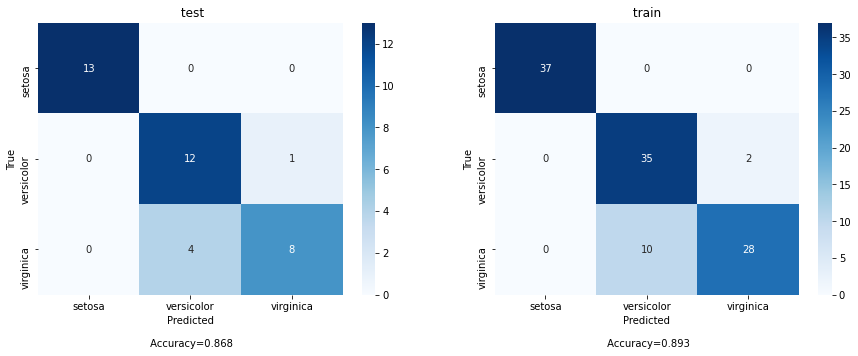

In [20]:
clf = KMeans(n_clusters=3, random_state=0)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

make_confusion_matrix(y_test,y_pred, y_train, y_pred_train)


**Take-Aways:**

* K-Means was able to  get 86.8% of accuracy in the test set
* Although training accuracy is slighty higher than test accuracy, the different is so little that the model is considered to not overfit the training data

## 2) similar to the previous point, apply Gaussian mixture model to this data set

In [21]:
from sklearn.mixture import GaussianMixture

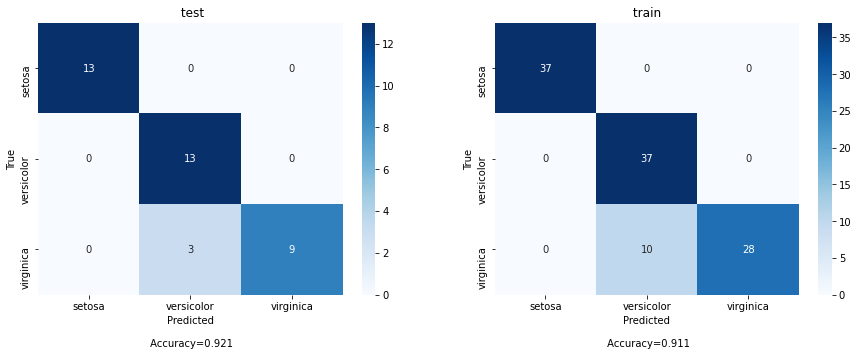

In [22]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_train,y_train)

y_pred_gmm = gmm.predict(X_test)

make_confusion_matrix(y_test, y_pred_gmm, y_train, gmm.predict(X_train))

**Take-Aways:**

* GMM performed better than K-mean, with an accuracy of 92,1%
* GMM has a higher accuracy score in the the training set so there's no overfit

## 3) compare with SOM results (suggestion: use a map size of 20)

In [23]:
import sompy

In [24]:
# Lets train a SOM with 20x20 neurons
mapsize = [20,20]

som = sompy.SOMFactory.build(X_train, mapsize, mask=None, mapshape='planar', lattice='rect', 
                             normalization='var', initialization='pca', neighborhood='gaussian', 
                             training='batch', name='sompy')


som.train(n_job=-1, verbose=0)
cl = som.cluster(n_clusters=3) # definition of the number of clusters

In [25]:
def predict_som(X, y_true, som):
    ''' function to get the cluster label for X on a trained SOM.
        Since the clusters numbers don't represent the class numbers, 
        the function seeks for the mode of the class inside each cluster to label the cluster
    '''
    px = som.project_data(X) # project the data into the SOM 
    y = []
    for x in px: # get the cluster number of each sample
        pred =  som.cluster_labels[x]
        y.append(pred)
    y =  np.array(y)    

    # provide each cluster the mode label
    from statistics import mode

    y_labels = np.zeros_like(y)

    for lab in range(3):
        mask = (y == lab)
        y_labels[mask] = mode(y_true[mask])         

    return y_labels

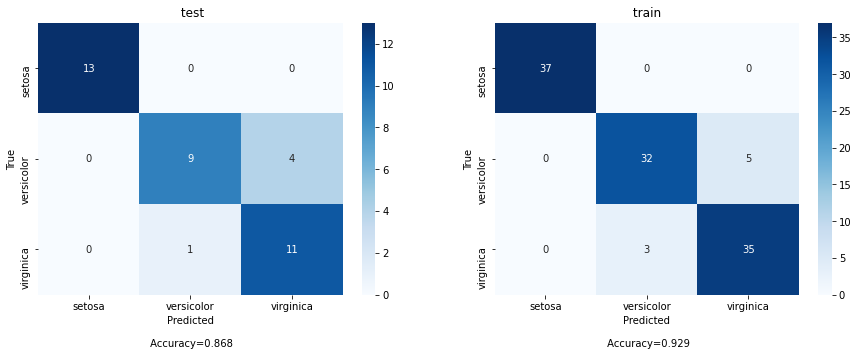

In [26]:
y_pred_som = predict_som(X_test,y_test, som)
y_pred_som_train = predict_som(X_train,y_train, som)

make_confusion_matrix(y_test, y_pred_som, y_train, y_pred_som_train)

**Take-Aways:**

* SOM has 86.8% of accuracy in the test set, which is the same as K-means and that makes sense
* The acuracy on the training set is 92.9% which could indicate an overfitting, while K-mean had no overfitting problems
* The best model was **GMM**, with better accuracy and not overfitting of the data